# Lesson 14.3 Batch Normalization综合调参实战

## 一、Batch Normalization与Batch_size综合调参

- 使用BN时至少需要保证小批数据量（batch_size)在15-30以上，才能进行相对准确的预估
- 通过设置BN,来提高从局部最小值点中跳出的效率
- 确保BN层对整体统计量估计的可信度的方法
  - 调高batch_size
  - 调低momentum参数

In [2]:
#—————————————————————batch_size设置为50—————————————————————
# 设置随机数种子
torch.manual_seed(420)  

# 创建最高项为2的多项式回归数据集
features, labels = tensorGenReg(w=[2, -1], bias=False, deg=2)

# 进行数据集切分与加载
train_loader, test_loader = split_loader(features, labels, batch_size=50)


In [4]:
#—————————————————是否带BN层 - 模型训练对比——————————————————
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model1 = net_class1(act_fun= torch.sigmoid)    
sigmoid_model1_norm = net_class1(act_fun= torch.sigmoid,BN_model='pre')                                            
        
# 创建模型容器
model_l = [sigmoid_model1, sigmoid_model1_norm]           
name_l = ['sigmoid_model1', 'sigmoid_model1_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_l, test_l = model_comparison(model_l = model_l, 
                                   name_l = name_l, 
                                   train_data = train_loader,
                                   test_data = test_loader,
                                   num_epochs = num_epochs, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = lr, 
                                   cla = False, 
                                   eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

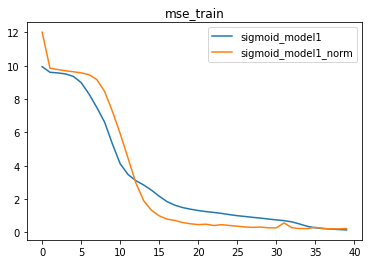

In [5]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

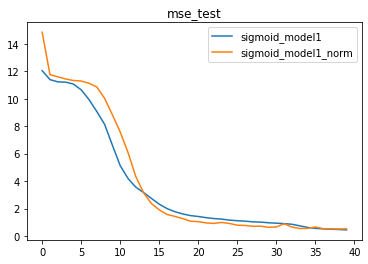

In [6]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

# 当提升batch_size之后，带BN层的模型效果有明显提升，
# 相比原始模型，带BN层的模型拥有更快的收敛速度。

## 二、复杂模型上的Batch_normalization表现

- 建议更频繁的使用更加复杂的模型并带上BN层
  - 核心原因：复杂模型带上BN层之后会有更大的优化空间

增加模型复杂度，此处我们创建满足$y=2x_1^2-x_2^2+3x_3^2+x_4^2+2x_5^2$的回归类数据集。

In [8]:
#—————————————————————创建复杂数据————————————————————
# 设置随机数种子
torch.manual_seed(420)  

# 创建最高项为2的多项式回归数据集
features, labels = tensorGenReg(w=[2, -1, 3, 1, 2], bias=False, deg=2)

# 进行数据集切分与加载
train_loader, test_loader = split_loader(features, labels, batch_size=50)

接下来，我们同时创建Sigmoid1-4，并且通过对比带BN层的模型和不带BN层的模型来进行测试。
- classn，表示带有n个隐藏层的模型

In [9]:
# =============class1对比模型=================
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model1 = net_class1(act_fun= torch.sigmoid, in_features=5)
sigmoid_model1_norm = net_class1(act_fun= torch.sigmoid, in_features=5, BN_model='pre')

# 创建模型容器
model_ls1 = [sigmoid_model1, sigmoid_model1_norm]           
name_ls1 = ['sigmoid_model1', 'sigmoid_model1_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_ls1, test_ls1 = model_comparison(model_l = model_ls1, 
                                       name_l = name_ls1, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)


# =============class2对比模型=================
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model2 = net_class2(act_fun= torch.sigmoid, in_features=5)
sigmoid_model2_norm = net_class2(act_fun= torch.sigmoid, in_features=5, BN_model='pre')

# 创建模型容器
model_ls2 = [sigmoid_model2, sigmoid_model2_norm]           
name_ls2 = ['sigmoid_model2', 'sigmoid_model2_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_ls2, test_ls2 = model_comparison(model_l = model_ls2, 
                                       name_l = name_ls2, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# =============class3对比模型=================
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model3 = net_class3(act_fun= torch.sigmoid, in_features=5)
sigmoid_model3_norm = net_class3(act_fun= torch.sigmoid, in_features=5, BN_model='pre')

# 创建模型容器
model_ls3 = [sigmoid_model3, sigmoid_model3_norm]           
name_ls3 = ['sigmoid_model3', 'sigmoid_model3_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_ls3, test_ls3 = model_comparison(model_l = model_ls3, 
                                       name_l = name_ls3, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# =============class4对比模型=================
比模型
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
sigmoid_model4 = net_class4(act_fun= torch.sigmoid, in_features=5)
sigmoid_model4_norm = net_class4(act_fun= torch.sigmoid, in_features=5, BN_model='pre')

# 创建模型容器
model_ls4 = [sigmoid_model4, sigmoid_model4_norm]           
name_ls4 = ['sigmoid_model4', 'sigmoid_model4_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_ls4, test_ls4 = model_comparison(model_l = model_ls4, 
                                       name_l = name_ls4, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

<AxesSubplot:>

Text(0.5, 1.0, 'mse_train_ls1')

<AxesSubplot:>

Text(0.5, 1.0, 'mse_train_ls2')

<AxesSubplot:>

Text(0.5, 1.0, 'mse_train_ls3')

<AxesSubplot:>

Text(0.5, 1.0, 'mse_train_ls4')

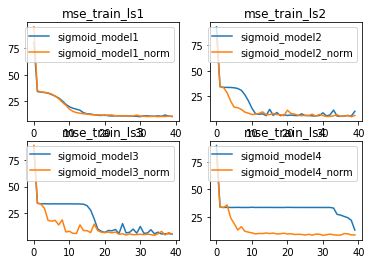

In [10]:
#——————————————————————————绘图——————————————————————————
# 训练误差
plt.subplot(221)
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), train_ls1[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls1')

plt.subplot(222)
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), train_ls2[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls2')

plt.subplot(223)
for i, name in enumerate(name_ls3):
    plt.plot(list(range(num_epochs)), train_ls3[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls3')

plt.subplot(224)
for i, name in enumerate(name_ls4):
    plt.plot(list(range(num_epochs)), train_ls4[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls4')

<AxesSubplot:>

Text(0.5, 1.0, 'mse_test_ls1')

<AxesSubplot:>

Text(0.5, 1.0, 'mse_test_ls2')

<AxesSubplot:>

Text(0.5, 1.0, 'mse_test_ls3')

<AxesSubplot:>

Text(0.5, 1.0, 'mse_test_ls4')

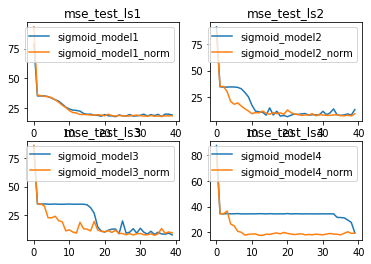

In [11]:
# 训练误差
plt.subplot(221)
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), test_ls1[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls1')

plt.subplot(222)
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), test_ls2[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls2')

plt.subplot(223)
for i, name in enumerate(name_ls3):
    plt.plot(list(range(num_epochs)), test_ls3[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls3')

plt.subplot(224)
for i, name in enumerate(name_ls4):
    plt.plot(list(range(num_epochs)), test_ls4[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls4')



- BN层对更加复杂模型的优化效果更好
越复杂的模型对于梯度不平稳的问题就越明显，因此BN层在解决该问题后模型效果提升就越明显。

Text(0.5, 1.0, 'mse_test')

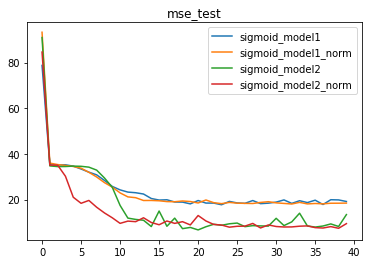

In [12]:
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), test_ls1[i], label=name)

for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), test_ls2[i], label=name)
    
plt.legend(loc = 1)
plt.title('mse_test')

# 训练误差对比
# 针对复杂数据集，在一定范围内，伴随模型复杂度提升，模型效果会有显著提升。

Text(0.5, 1.0, 'mse_test')

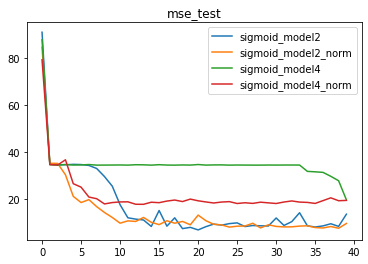

In [13]:
#———————————————————————————模型2 - 4对比———————————————————————————
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), test_ls2[i], label=name)
for i, name in enumerate(name_ls4):
    plt.plot(list(range(num_epochs)), test_ls4[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

# 模型复杂度提升也是过犹不及的
# 当模型太过于复杂时，仍然会出现模型效果下降的问题

&emsp;&emsp;对于Sigmoid来说，BN层能很大程度上缓解梯度消失问题，从而提升模型收敛速度，并且小幅提升模型效果。

而对于激活函数本身就能输出Zero-Centered结果的tanh函数，BN层的优化效果会更好。

In [14]:
#————————————————————————对比：tahn模型加入BN层—————————————————————————
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.03
num_epochs = 40

# 模型训练
train_lh, test_lh = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

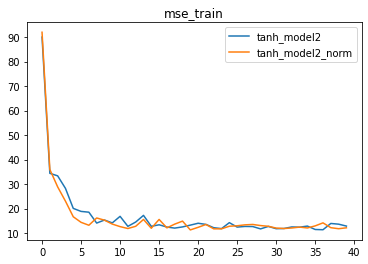

In [15]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_lh[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

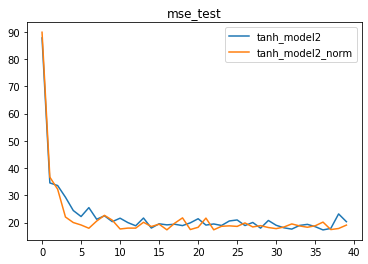

In [16]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_lh[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

相比Sigmoid，使用tanh激活函数本身就是更加复杂的一种选择，因此，BN层在tanh上所表现出的更好的优化效果，也能看成是BN在复杂模型上效果有所提升。

In [17]:
# 查看训练过程记录的训练误差
train_lh

tensor([[90.0410, 34.3948, 33.3687, 28.2551, 20.0755, 18.8420, 18.5205, 14.0756,
         15.3193, 14.1538, 16.8258, 12.7386, 14.5015, 17.2214, 12.7469, 13.3785,
         12.4568, 12.0257, 12.5091, 13.2406, 14.0055, 13.5360, 12.1858, 11.8168,
         14.2481, 12.4385, 12.7013, 12.6579, 11.7017, 12.7115, 11.7814, 11.8659,
         12.4941, 12.3978, 12.8523, 11.4620, 11.3599, 13.9206, 13.6305, 12.8502],
        [92.0081, 35.9723, 28.8604, 23.0279, 16.6548, 14.3798, 13.1903, 16.1647,
         15.2639, 13.6663, 12.6325, 11.8537, 12.7641, 15.5530, 11.9614, 15.5579,
         12.1235, 13.6475, 14.8731, 11.2834, 12.3394, 13.4971, 11.7231, 11.7223,
         12.7866, 12.9756, 13.3550, 13.5154, 13.0593, 12.7676, 12.0340, 11.8491,
         12.0746, 12.4311, 12.0827, 12.9328, 14.1644, 12.1968, 11.7727, 12.1459]])

In [18]:
# 查看最后五次训练误差计算结果
train_lh[1:,-5:]

tensor([[12.9328, 14.1644, 12.1968, 11.7727, 12.1459]])

In [19]:
train_lh[1:,-5:].mean()

tensor(12.6425)

In [20]:
test_lh[1:,-5:].mean()

tensor(18.6611)

## 三、包含BN层的神经网络的学习率优化

&emsp;&emsp;BN层对模型迭代的平稳性提升帮助不大，相反，加入BN层的模型收敛过程“不平稳”的特点好像有增无减，这点从Sigmoid激活函数的收敛过程看的尤其明显。

- BN层的神经网络模型对学习率是高度敏感
BN层所带来的不平稳性，我们可以简单理解成模型可以在更大范围搜索最优解，相比不带BN层的神经网络模型，带BN层的神经网络的不平稳会更大程度受到学习率的影响。

针对优化空间，我们需要铺垫两个基础认知：
- 其一是学习率敏感度，
- 其二是学习率学习曲线（伴随学习率调整模型效果变化曲线）。

### 1.学习率敏感度

首先，我们通过简单实验来观测带BN层的模型对于学习率的敏感程度。我们挑选相对复杂、迭代不平稳的tanh3和tanh4模型进行实验。

In [21]:
#——————————————————————4种学习率的对比(0.1,0.03,0.001,0.005)——————————————————————
# 0.03 平时常用的学习率 0.005 偏小的学习率
# 
#==================== 0.1学习率====================
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型   
tanh_model3 = net_class3(act_fun=torch.tanh, in_features=5)                          
tanh_model3_norm = net_class3(act_fun=torch.tanh, in_features=5, BN_model='pre') 
tanh_model4 = net_class4(act_fun=torch.tanh, in_features=5)                          
tanh_model4_norm = net_class4(act_fun=torch.tanh, in_features=5, BN_model='pre')    
        
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
num_epochs = 40
lr = 0.1

# 模型训练
train_l1, test_l1 = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)


# ========================0.03学习率=====================
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型   
tanh_model3 = net_class3(act_fun=torch.tanh, in_features=5)                          
tanh_model3_norm = net_class3(act_fun=torch.tanh, in_features=5, BN_model='pre') 
tanh_model4 = net_class4(act_fun=torch.tanh, in_features=5)                          
tanh_model4_norm = net_class4(act_fun=torch.tanh, in_features=5, BN_model='pre')    
        
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
num_epochs = 40
lr = 0.03

# 模型训练
train_l03, test_l03 = model_comparison(model_l = model_l, 
                                       name_l = name_l, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)


# ============================0.01学习率====================
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型   
tanh_model3 = net_class3(act_fun=torch.tanh, in_features=5)                          
tanh_model3_norm = net_class3(act_fun=torch.tanh, in_features=5, BN_model='pre') 
tanh_model4 = net_class4(act_fun=torch.tanh, in_features=5)                          
tanh_model4_norm = net_class4(act_fun=torch.tanh, in_features=5, BN_model='pre')    
        
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
num_epochs = 40
lr = 0.01

# 模型训练
train_l01, test_l01 = model_comparison(model_l = model_l, 
                                       name_l = name_l, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

#========================= 0.005学习率==========================
# 创建随机数种子
torch.manual_seed(24)  

# 实例化模型   
tanh_model3 = net_class3(act_fun=torch.tanh, in_features=5)                          
tanh_model3_norm = net_class3(act_fun=torch.tanh, in_features=5, BN_model='pre') 
tanh_model4 = net_class4(act_fun=torch.tanh, in_features=5)                          
tanh_model4_norm = net_class4(act_fun=torch.tanh, in_features=5, BN_model='pre')    
        
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
num_epochs = 40
lr = 0.005

# 模型训练
train_l005, test_l005 = model_comparison(model_l = model_l, 
                                         name_l = name_l, 
                                         train_data = train_loader,
                                         test_data = test_loader,
                                         num_epochs = num_epochs, 
                                         criterion = nn.MSELoss(), 
                                         optimizer = optim.SGD, 
                                         lr = lr, 
                                         cla = False, 
                                         eva = mse_cal)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

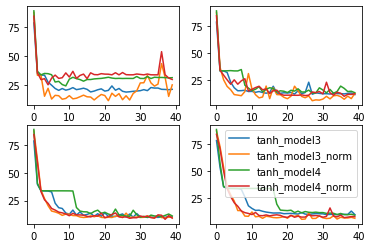

In [22]:
# 训练误差
plt.subplot(221)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l1[i])

plt.subplot(222)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l03[i])

plt.subplot(223)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l01[i])

plt.subplot(224)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l005[i], label=name)
plt.legend(loc = 1)

能够看出，随着学习率逐渐变化，拥有BN层的模型表现出更加剧烈的波动，这也说明拥有BN层的模型对学习率变化更加敏感。

&emsp;&emsp;BN层对学习率敏感的背后，其实代表的是BN层可以在更大范围内进行最小值搜索（可以想象成下山的时候山会同步移动），此时调整学习率，也就拥有了更大的优化空间。

### 2.学习率学习曲线

&emsp;&emsp;另外，我们需要知道，学习率作为模型重要参数，学习率的调整也会影响实际模型效果。

接下来我们将tanh2模型的学习率调整为0.01，测试模型表现。

In [71]:
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.01
num_epochs = 40

# 模型训练
train_ls, test_ls = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

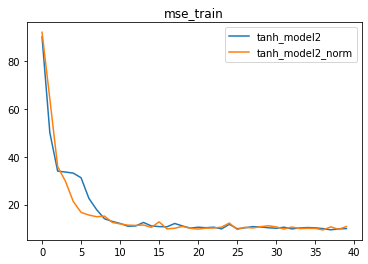

In [72]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_ls[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

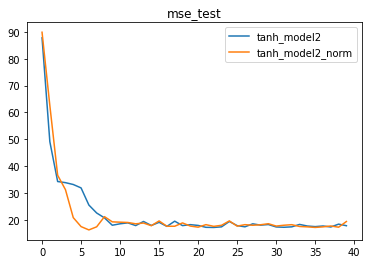

In [73]:
# 测试误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_ls[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

# 加入BN层，模型的训练效果更好

同样，我们统计最后5轮训练误差和测试误差

In [74]:
# 学习率为0.01时模型误差
train_ls[1:,-5:].mean()
test_ls[1:,-5:].mean()

tensor(10.1615)

tensor(17.7898)

In [75]:
# 对比此前tanh2模型训练误差和测试误差
# 学习率为0.03时模型误差
train_lh[1:,-5:].mean()
test_lh[1:,-5:].mean()

# 学习率较大时，模型反复振荡

tensor(12.6425)

tensor(18.6611)

- 学习率较大时，迭代到后期会出现模型迭代解在最小值点附近反复震荡，出于各种原因，无法抵达最小值点
  - 调小学习率之后，迭代解就能够通过更小的孔
  - 如果学习率调的过小，不仅会降低迭代速度，同时也极有可能导致迭代解在最小值附近停止不动


In [76]:
#————————————————————将学习率调整为0.001进行建模——————————————————

torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.001
num_epochs = 40

# 模型训练
train_lss, test_lss = model_comparison(model_l = model_l, 
                                       name_l = name_l, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# 学习率为0.001时模型误差
train_lss[1:,-5:].mean()
test_lss[1:,-5:].mean()


tensor(9.3185)

tensor(16.9204)

In [77]:
#————————————————————将学习率调整为0.005进行建模——————————————————
# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.005
num_epochs = 40

# 模型训练
train_lms, test_lms = model_comparison(model_l = model_l, 
                                       name_l = name_l, 
                                       train_data = train_loader,
                                       test_data = test_loader,
                                       num_epochs = num_epochs, 
                                       criterion = nn.MSELoss(), 
                                       optimizer = optim.SGD, 
                                       lr = lr, 
                                       cla = False, 
                                       eva = mse_cal)

# 学习率为0.05时模型误差
train_lms[1:,-5:].mean()
test_lms[1:,-5:].mean()

# 调到学习率后，MSE的取值降低 模型的效果更好
# 并咩有啊.....

tensor(9.5439)

tensor(17.3677)

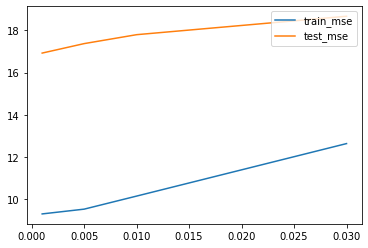

In [78]:
# 同样，取最后四个结果取均值，绘制折线图进行观察。

lr_l = [0.03, 0.01, 0.005, 0.001]
train_ln = [train_lh[1:,-5:].mean(), train_ls[1:,-5:].mean(), train_lms[1:,-5:].mean(), train_lss[1:,-5:].mean()]
test_ln = [test_lh[1:,-5:].mean(), test_ls[1:,-5:].mean(), test_lms[1:,-5:].mean(), test_lss[1:,-5:].mean()]

plt.plot(lr_l, train_ln, label='train_mse')
plt.plot(lr_l, test_ln, label='test_mse')
plt.legend(loc = 1)
#plt.ylim(0, 15)


# 按理来说 MSE的取值应该要是 U型
# ....画图出来的结果 压根不是这样....有点无语...

对于学习率的调整，一般都会出现倒U型曲线。我们能够发现，在当前模型条件下，学习率为0.005左右时模型效果较好。

### 3.不同学习率下不同模型优化效果

&emsp;&emsp;既然学习率学习曲线是U型曲线，那么U型的幅度其实就代表着学习率对于该模型的优化空间，这里我们可以通过简单实验，来观测不同模型的U型曲线的曲线幅度。

首先，对于tanh2来说，带BN层的模型学习率优化效果比不带BN层学习率优化效果更好。

In [79]:
lr_l = [0.03, 0.01, 0.005, 0.001]
train_ln = [train_lh[1:,-5:].mean(), train_ls[1:,-5:].mean(), train_lms[1:,-5:].mean(), train_lss[1:,-5:].mean()]
test_ln = [test_lh[1:,-5:].mean(), test_ls[1:,-5:].mean(), test_lms[1:,-5:].mean(), test_lss[1:,-5:].mean()]
train_l = [train_lh[0:,-5:].mean(), train_ls[0:,-5:].mean(), train_lms[0:,-5:].mean(), train_lss[0:,-5:].mean()]
test_l = [test_lh[0:,-5:].mean(), test_ls[0:,-5:].mean(), test_lms[0:,-5:].mean(), test_lss[0:,-5:].mean()]

<AxesSubplot:>

(4.0, 25.0)

Text(0.5, 1.0, 'With BN(tanh2)')

<AxesSubplot:>

(4.0, 25.0)

Text(0.5, 1.0, 'Without BN(tanh2)')

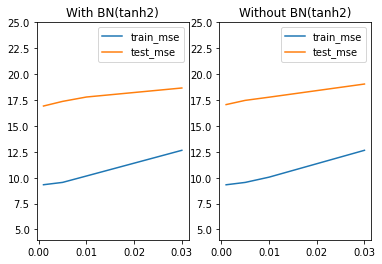

In [80]:
plt.subplot(121)
plt.plot(lr_l, train_ln, label='train_mse')
plt.plot(lr_l, test_ln, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('With BN(tanh2)')
plt.subplot(122)
plt.plot(lr_l, train_l, label='train_mse')
plt.plot(lr_l, test_l, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('Without BN(tanh2)')

In [81]:
train_lms[1:,-5:].mean()

tensor(9.5439)

In [82]:
#——————————————————补充：tanh3、4在学习率为0.001时的表现————————————————————

# 设置随机数种子
torch.manual_seed(24)  

# 实例化模型  
tanh_model3 = net_class3(act_fun= torch.tanh, in_features=5)
tanh_model3_norm = net_class3(act_fun= torch.tanh, in_features=5, BN_model='pre')
tanh_model4 = net_class4(act_fun= torch.tanh, in_features=5)
tanh_model4_norm = net_class4(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model3, tanh_model3_norm, tanh_model4, tanh_model4_norm]           
name_l = ['tanh_model3', 'tanh_model3_norm', 'tanh_model4', 'tanh_model4_norm']

# 核心参数
lr = 0.001
num_epochs = 40

# 模型训练
train_l001, test_l001 = model_comparison(model_l = model_l, 
                                         name_l = name_l, 
                                         train_data = train_loader,
                                         test_data = test_loader,
                                         num_epochs = num_epochs, 
                                         criterion = nn.MSELoss(), 
                                         optimizer = optim.SGD, 
                                         lr = lr, 
                                         cla = False, 
                                         eva = mse_cal)

In [83]:
train_l001

tensor([[78.6160, 73.0741, 62.7314, 49.7035, 39.8072, 35.4305, 34.1479, 33.8666,
         33.8072, 33.7818, 33.7593, 33.7344, 33.7036, 33.6607, 33.5916, 33.4553,
         33.0751, 31.2290, 26.4127, 22.3997, 16.2871, 14.0410, 13.4491, 13.4165,
         11.6267, 10.8050, 10.6071, 10.3012, 10.2839, 10.0727, 10.6420,  9.9281,
         10.1456,  9.9557,  9.8683,  9.9394, 10.3162,  9.5910,  9.5862,  9.3900],
        [87.5913, 84.0227, 78.8695, 71.3660, 62.8165, 53.6675, 43.8606, 36.1922,
         31.5245, 28.0587, 25.6545, 22.0005, 19.7010, 13.1383, 12.9455,  9.3051,
          8.5422,  7.9764,  7.6243,  6.4895,  6.5646,  6.6099,  7.8858,  5.9139,
          5.1314,  5.9131,  7.9608,  5.8426,  5.8166,  4.7184,  5.6783,  4.7145,
          4.6637,  4.8243,  4.4928,  4.4890,  4.3852,  5.8059,  4.3438,  4.7365],
        [88.9965, 81.7899, 68.5532, 52.5133, 40.7311, 35.6595, 34.2206, 33.9274,
         33.8792, 33.8671, 33.8606, 33.8549, 33.8497, 33.8451, 33.8408, 33.8370,
         33.8336, 33.8305,

In [84]:
lr_l = [0.03, 0.01, 0.005, 0.001]
train_ln = [train_l03[1:,-5:].mean(), train_l01[1:,-5:].mean(), train_l005[1:,-5:].mean(), train_l001[1:,-5:].mean()]
test_ln = [test_l03[1:,-5:].mean(), test_l01[1:,-5:].mean(), test_l005[1:,-5:].mean(), test_l001[1:,-5:].mean()]
train_l = [train_l03[0:,-5:].mean(), train_l01[0:,-5:].mean(), train_l005[0:,-5:].mean(), train_l001[0:,-5:].mean()]
test_l = [test_l03[0:,-5:].mean(), test_l01[0:,-5:].mean(), test_l005[0:,-5:].mean(), test_l1[0:,-5:].mean()]

<AxesSubplot:>

(4.0, 25.0)

Text(0.5, 1.0, 'With BN(tanh3)')

<AxesSubplot:>

(4.0, 25.0)

Text(0.5, 1.0, 'Without BN(tanh3)')

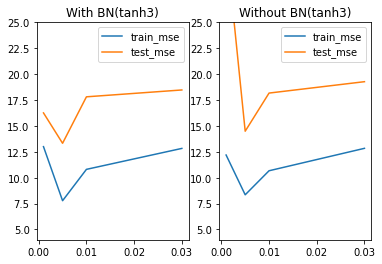

In [85]:
plt.subplot(121)
plt.plot(lr_l, train_ln, label='train_mse')
plt.plot(lr_l, test_ln, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('With BN(tanh3)')
plt.subplot(122)
plt.plot(lr_l, train_l, label='train_mse')
plt.plot(lr_l, test_l, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('Without BN(tanh3)')

<AxesSubplot:>

(4.0, 25.0)

Text(0.5, 1.0, 'With BN(tanh4)')

<AxesSubplot:>

(4.0, 25.0)

Text(0.5, 1.0, 'Without BN(tanh4)')

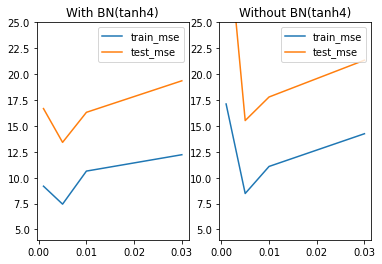

In [86]:
#————————————————————————————tahn4学习率&BNc层模型对比————————————————————————————
lr_l = [0.03, 0.01, 0.005, 0.001]
train_ln = [train_l03[3:,-5:].mean(), train_l01[3:,-5:].mean(), train_l005[3:,-5:].mean(), train_l001[3:,-5:].mean()]
test_ln = [test_l03[3:,-5:].mean(), test_l01[3:,-5:].mean(), test_l005[3:,-5:].mean(), test_l001[3:,-5:].mean()]
train_l = [train_l03[2:,-5:].mean(), train_l01[2:,-5:].mean(), train_l005[2:,-5:].mean(), train_l001[2:,-5:].mean()]
test_l = [test_l03[2:,-5:].mean(), test_l01[2:,-5:].mean(), test_l005[2:,-5:].mean(), test_l1[2:,-5:].mean()]

plt.subplot(121)
plt.plot(lr_l, train_ln, label='train_mse')
plt.plot(lr_l, test_ln, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('With BN(tanh4)')
plt.subplot(122)
plt.plot(lr_l, train_l, label='train_mse')
plt.plot(lr_l, test_l, label='test_mse')
plt.legend(loc = 1)
plt.ylim(4, 25)
plt.title('Without BN(tanh4)')

# tahn4 加入BN层的效果更好

整体来看，带BN层的模型对学习率调整更加敏感，优化空间更大。

In [87]:
# 不带BN层 tahn 234的模型效果
train_lms[0:,-5:].mean()   
train_l005[0:,-5:].mean()
train_l005[2:,-5:].mean()

tensor(9.5419)

tensor(8.3474)

tensor(8.4714)

In [88]:
# 带有BN层的tahn 2 3 4的模型效果 
train_lms[1:,-5:].mean()
train_l005[1:,-5:].mean()
train_l005[3:,-5:].mean()
# 随机模型复杂度增加，模型的效果很好

tensor(9.5439)

tensor(7.7749)

tensor(7.4440)

- 学习率调整在复杂且带BN层模型上表现效果更好

## 四、带BN层的神经网络模型综合调整策略总结

- 简单数据、简单模型下不用BN层，加入BN层效果并不显著；

- BN层的使用需要保持running_mean和running_var的无偏性，因此需要谨慎调整batch_size；

- 学习率是重要的模型优化的超参数，一般来说学习率学习曲线都是U型曲线；

- 从学习率调整角度出发，对于加入BN层的模型，学习率调整更加有效；对于带BN层模型角度来说，BN层能够帮助模型拓展优化空间，使得很多优化方法都能在原先无效的模型上生效；

- 对于复杂问题，在计算能力能够承担的范围内，应当首先构建带BN层的复杂模型，然后再试图进行优化，就像上文所述，很多优化方法只对带BN层的模型有效；

其他拓展方面结论：

- 关于BN和Xavier/Kaiming方法，一般来说，使用BN层的模型不再会用参数初始化方法，从理论上来看添加BN层能够起到参数初始化的相等效果；（另外，带BN层模型一般也不需要使用Dropout方法）
- 对于ReLU叠加的模型来说，加入BN层之后能够有效缓解Dead ReLU Problem，此时无须刻意调小学习率，能够在收敛速度和运算结果间保持较好的平衡。

- BN层是目前大部分深度学习模型的标配，但前提是你有能力去对其进行优化；